`Batch Normalization` is a technique used in deep learning to stabilize and accelerate the training of artificial neural networks. It was introduced by Sergey Ioffe and Christian Szegedy in their 2015 paper "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift".

The main idea behind Batch Normalization is to normalize the inputs of each layer in such a way that they have a mean output activation of zero and standard deviation of one. This is analogous to how the input data to the network is usually standardized.

Batch Normalization has the following benefits:

1. **Networks train faster**: While normalizing the inputs to the network can help speed up training, the distributions of each layer's inputs can change during training as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization. Batch Normalization mitigates this problem, known as internal covariate shift, allowing for higher learning rates and less careful initialization.

2. **Allows higher learning rates**: Gradient descent usually requires small learning rates for the network to converge. As Batch Normalization normalizes the inputs to each layer, it allows the use of much higher learning rates, speeding up the training process.

3. **Makes weights easier to initialize**: Weight initialization can be difficult, and it's even more so when creating deep networks. Batch Normalization seems to allow us to be much less careful about choosing our initial starting weights.

4. **Makes more activation functions viable**: Some activation functions do not work well in some situations. Sigmoids lose their gradient pretty quickly, which means they can't be used in deep networks. And ReLUs often die out during training, where they stop learning completely, so we need to be careful about the range of our initial weights. Because Batch Normalization regulates the values going into each activation function, non-linearlities that don't seem to work well in deep networks tend to work much better.

5. **Simplifies the creation of deeper networks**: As Batch Normalization normalizes the inputs to each layer, we can build much deeper networks with standard gradient descent.

6. **Provides a bit of regularisation**: Batch Normalization adds a little noise to your network. In some cases, such as Inception modules, where Batch Normalization was applied, the authors found that there was no need for Dropout. Note that you might want to turn noise off during testing, by using tf.layers.batch_normalization's training parameter.

7. **Could yield better results overall**: Some tests seem to show that Batch Normalization actually improves the performance of the network. However, it's really an optimization to help train faster, so you shouldn't think of it as a way to make your network better. But since it lets you train networks faster, that means you can iterate over more designs more quickly. It also lets you build deeper networks, which are usually better. So when you factor in everything, you're more likely to find a better network when using Batch Normalization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./concertriccir2.csv')
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


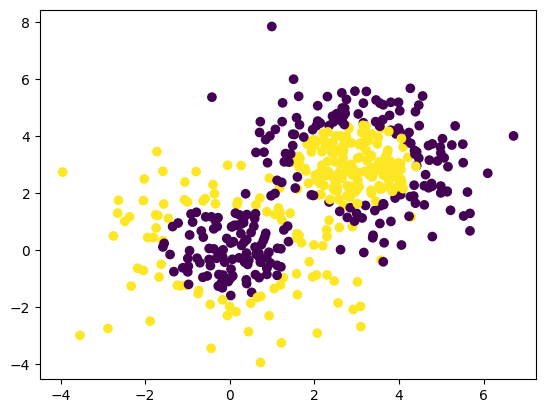

In [3]:
plt.scatter(x = df['X'], y = df['Y'], c = df['class'], alpha = 1)

In [4]:
X = df[['X','Y']]
y = df[['class']]

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [6]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4362 - loss: 0.6878 - val_accuracy: 0.3000 - val_loss: 0.7932
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4019 - loss: 0.7005 - val_accuracy: 0.2800 - val_loss: 0.7788
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4086 - loss: 0.6864 - val_accuracy: 0.3300 - val_loss: 0.7686
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4137 - loss: 0.6820 - val_accuracy: 0.3100 - val_loss: 0.7598
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4369 - loss: 0.6948 - val_accuracy: 0.3100 - val_loss: 0.7518
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4695 - loss: 0.6794 - val_accuracy: 0.3400 - val_loss: 0.7463
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4813 - loss: 0.6698 - val_accuracy: 0.3700 - val_loss: 0.7405
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4777 - loss: 0.6765 - val_accuracy: 0.3700 - 

In [9]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4197 - loss: 0.8326 - val_accuracy: 0.4300 - val_loss: 0.9473
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4310 - loss: 0.8292 - val_accuracy: 0.4300 - val_loss: 0.9035
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3631 - loss: 0.8208 - val_accuracy: 0.4300 - val_loss: 0.8816
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4503 - loss: 0.7443 - val_accuracy: 0.4300 - val_loss: 0.8618
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4166 - loss: 0.7753 - val_accuracy: 0.4400 - val_loss: 0.8539
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3915 - loss: 0.7783 - val_accuracy: 0.4400 - val_loss: 0.8423
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3888 - loss: 0.7647 - val_accuracy: 0.5400 - val_loss: 0.8346
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4432 - loss: 0.7337 - val_accuracy: 0.5400 -

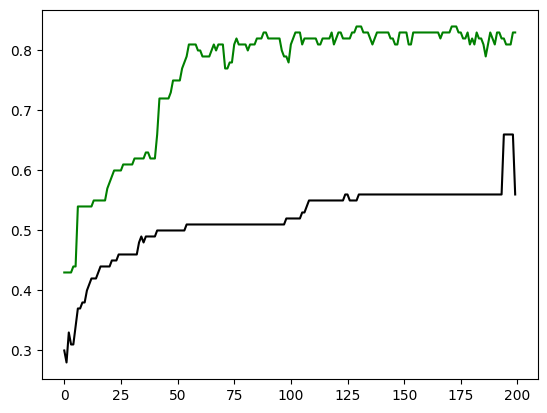

In [12]:
plt.plot(history1.history['val_accuracy'],color='black',label='Without Batch Normalization')
plt.plot(history2.history['val_accuracy'],color='green',label='With Batch Normalization')